[0.000e+00 5.000e-04 1.000e-03 ... 9.985e-01 9.990e-01 9.995e-01]
<class 'numpy.ndarray'>


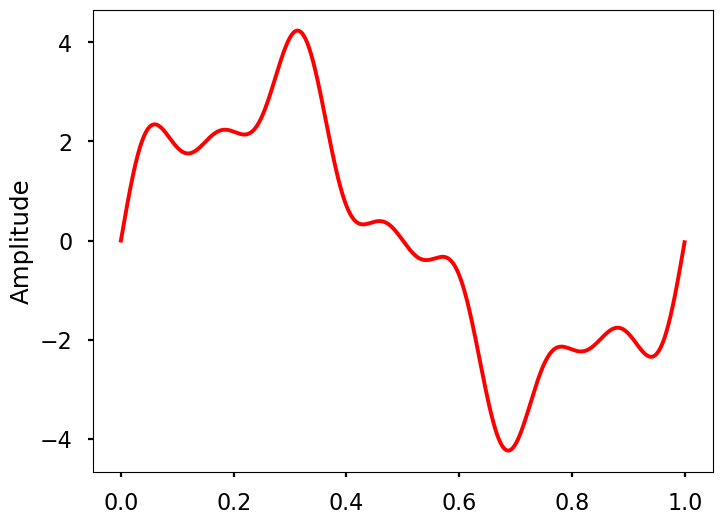

/var/folders/5k/jtfglwzj1g94cdqd9mt51cdr0000gn/T/ipykernel_7699/2720393544.py:42: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


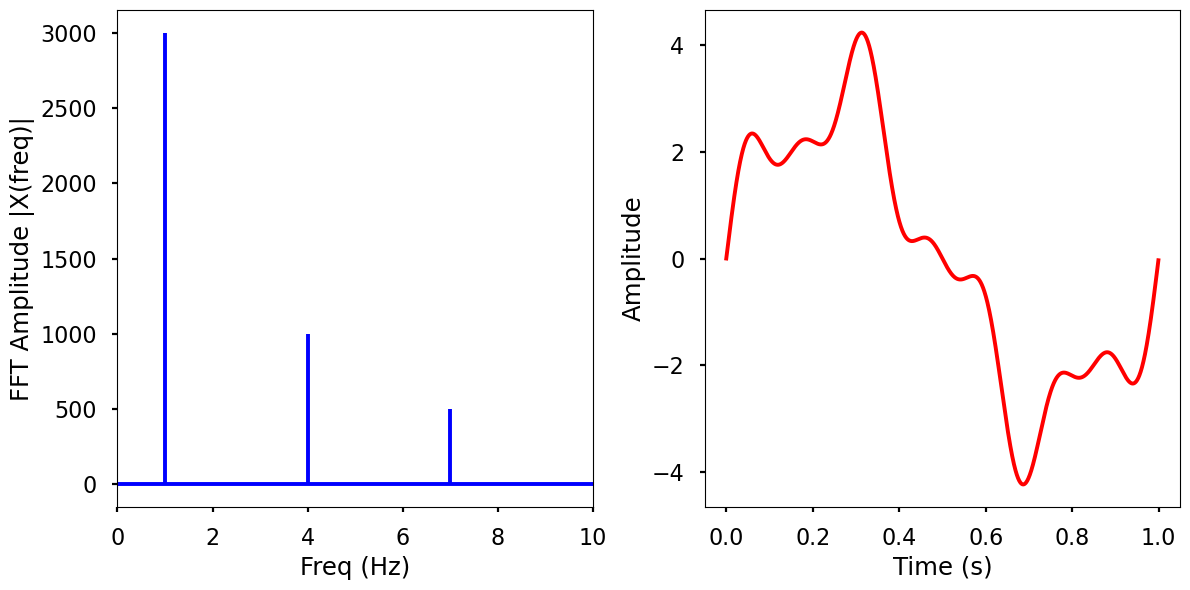

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

print(t)
print(type(t))
freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Best frequency: 0.90


0.0

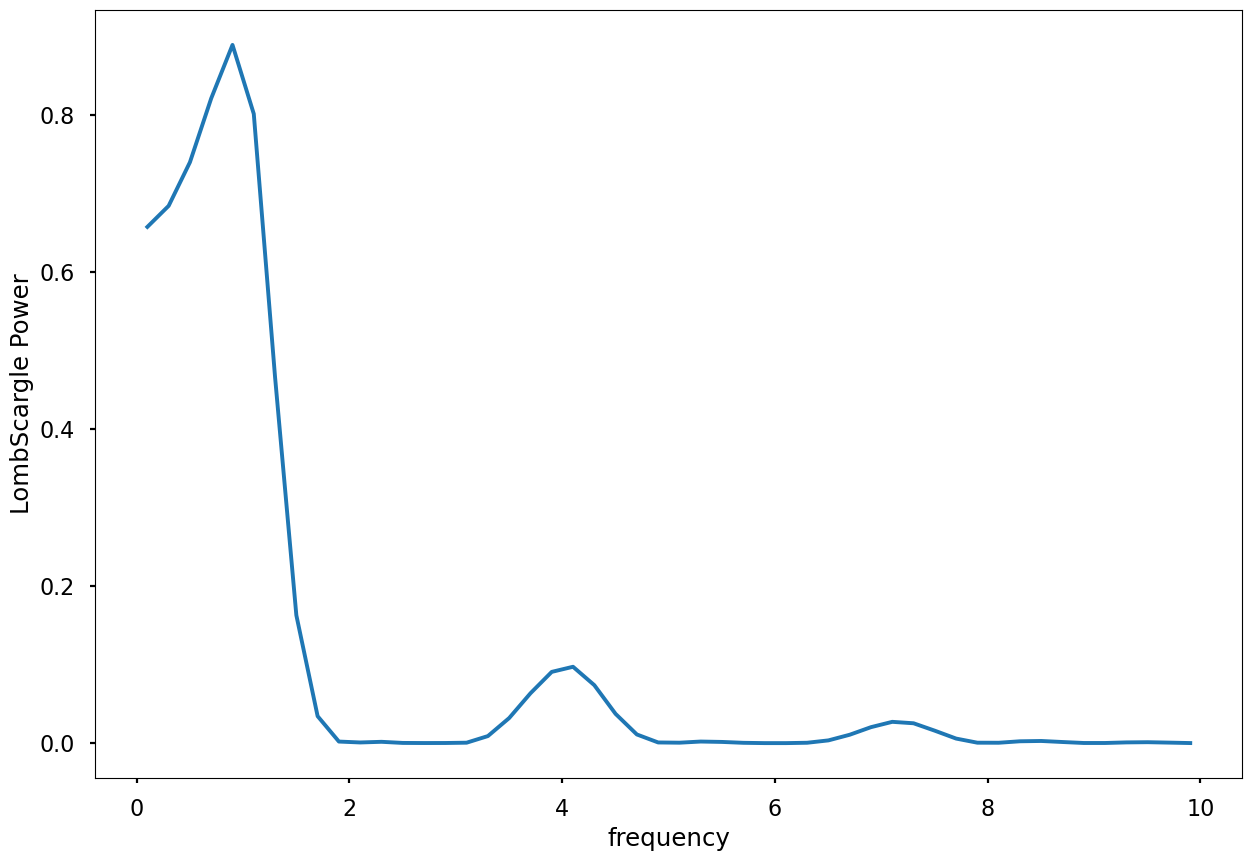

In [45]:
from astropy.timeseries import LombScargle

ls = LombScargle(t, x)


frequency, power = ls.autopower(
    minimum_frequency=0.1, 
    maximum_frequency=10, 
    nyquist_factor=5)

period = 1. / frequency

# sorted_index_power = np.argsort(power)
# sorted_frequency = frequency[sorted_index_power]
# print(np.flip(sorted_frequency)[0:-3])
best_frequency = frequency[np.argmax(power)]
print("Best frequency: {0:.2f}".format( best_frequency))

period

plt.xlabel('frequency')
plt.ylabel('LombScargle Power')
plt.tight_layout()
plt.plot(frequency, power)

#From docs
#What this tells us is that under the assumption 
# that there is no periodic signal in the data, we 
# will observe a peak this high or higher approximately 
# 0.4% of the time, which gives a strong indication that 
# a periodic signal is present in the data.

ls.false_alarm_probability(power.max())